In [1]:
# Import the libraries
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings("ignore")
import numpy as np

import pandas as pd
import import_ipynb
from cancer_helper import *
from init_data import *

importing Jupyter notebook from cancer_helper.ipynb
importing Jupyter notebook from init_data.ipynb


In [2]:
# Process the CSV data and put it into X as features
np_data = pd.read_csv('LGG.csv',keep_default_na=False, sep=';',header=None, encoding = "utf-8").values
X, feature_labels, vital_status, death_days_to, outcome = init_data_LGG(np_data)
num_groups = 5

**Vital status**

In class model:
Average train final cost: nan
Average train accuracy: 58.38 %
Average train F1 score: 0.73
Average test accuracy: 60.43 %
Average test F1 score: 0.75


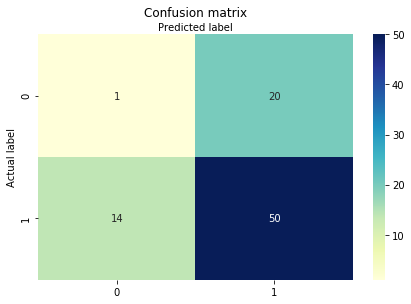


Scikit model:
Average train final cost: 7.75
Average train accuracy: 77.56 %
Average train F1 score: 0.84
Average test final cost: 7.80
Average test accuracy: 77.42 %
Average test F1 score: 0.83
Average Gaussian Naive Bayes accuracy: 83.95 %
Average Gaussian Naive Bayes F1 score: 0.89


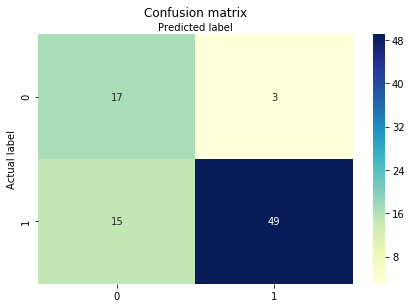


Highest average weights (absolute values!):
tumor_status : 12.64
gender : 1.11
age : 0.20


In [3]:
y = vital_status
iters = 200 # recommended 40000
alpha = 0.00000001

vital_status_train(X, y, alpha, iters, num_groups, feature_labels)

**Death days to**

In [4]:
dead = np.nonzero(vital_status == 0)[0]
y = death_days_to[dead].astype('int')
X_death = X[dead, :]
iters = 4000
alpha = 0.005

death_days_to_train(X_death, y, alpha, iters, num_groups)

In-class model:
Average final cost: 21582645.17
Mean in y: 1253.54
Variance in y: 1308800.68

Scikit model:
Average train accuracy: 26.87 %
Average test accuracy: 20.52 %


**Outcome**

In class model:
One vs all:
Average train accuracy: 52.16 %
Average train F1 score: 0.45
Average test accuracy: 50.49 %
Average test F1 score: 0.42


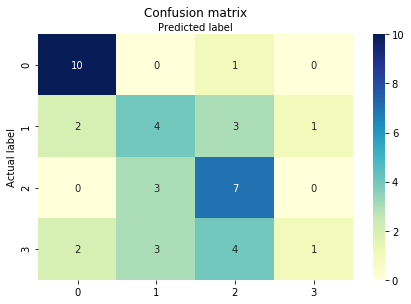


Scikit model:
Average train accuracy: 52.37 %
Average train F1 score: 0.48
Average test accuracy: 51.78 %
Average test F1 score: 0.48


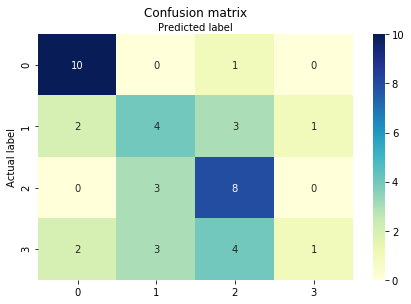


Highest average weights:
tumor_status : 13.75
histological_grade_g2 : 0.66
histological_grade_g3 : 0.64


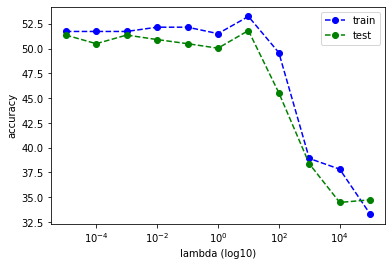

In [5]:
y = outcome
lambda_val = 0.1
interested_in = [0, 1, 2, 3]

# print_num_samples(y)
outcome_train(X, y, interested_in, lambda_val, num_groups, feature_labels)